In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
%pylab inline 


C:\Users\Shubham\Anaconda3.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


In [2]:
iris  =  datasets.load_iris()
print(iris.data[:5])
print(iris.target[:5])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [3]:
X = iris.data[:,2:]#petal length and width
y = iris.target

In [4]:
print(X[:5])
print(y[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0]


In [5]:
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 1, stratify=  y)

print ('labels count in y :',np.bincount(y))
print ('labels count in y_train:', np.bincount(y_train))
print ('labels count in y_test:', np.bincount(y_test))

labels count in y : [50 50 50]
labels count in y_train: [35 35 35]
labels count in y_test: [15 15 15]


In [6]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
from matplotlib.colors import  ListedColormap
import matplotlib.pyplot as plt

In [18]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

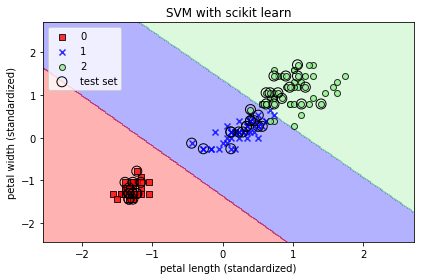

In [19]:
svm = SVC(kernel = 'linear' , C = 1.0 , random_state = 1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier = svm,
                     test_idx=range(105,150))


plt.title('SVM with scikit learn')
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()







In [20]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusionMatrix = confusion_matrix(y_test  , svm.predict(X_test_std))

print(confusionMatrix)
print(accuracy_score(y_test , svm.predict(X_test_std)))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
0.9777777777777777


In [21]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0]>0,
                       X_xor[:, 1]>0)
y_xor = np.where(y_xor, 1, -1)

In [23]:
X_xor

array([[ 1.62434536e+00, -6.11756414e-01],
       [-5.28171752e-01, -1.07296862e+00],
       [ 8.65407629e-01, -2.30153870e+00],
       [ 1.74481176e+00, -7.61206901e-01],
       [ 3.19039096e-01, -2.49370375e-01],
       [ 1.46210794e+00, -2.06014071e+00],
       [-3.22417204e-01, -3.84054355e-01],
       [ 1.13376944e+00, -1.09989127e+00],
       [-1.72428208e-01, -8.77858418e-01],
       [ 4.22137467e-02,  5.82815214e-01],
       [-1.10061918e+00,  1.14472371e+00],
       [ 9.01590721e-01,  5.02494339e-01],
       [ 9.00855949e-01, -6.83727859e-01],
       [-1.22890226e-01, -9.35769434e-01],
       [-2.67888080e-01,  5.30355467e-01],
       [-6.91660752e-01, -3.96753527e-01],
       [-6.87172700e-01, -8.45205641e-01],
       [-6.71246131e-01, -1.26645989e-02],
       [-1.11731035e+00,  2.34415698e-01],
       [ 1.65980218e+00,  7.42044161e-01],
       [-1.91835552e-01, -8.87628964e-01],
       [-7.47158294e-01,  1.69245460e+00],
       [ 5.08077548e-02, -6.36995647e-01],
       [ 1.

In [26]:
X_xor[:, 0]>0

array([ True, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,

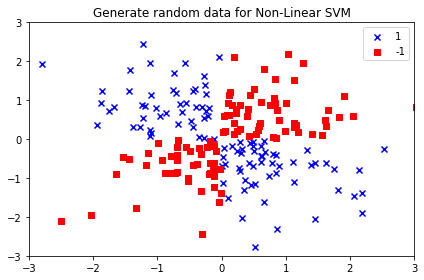

In [25]:
plt.scatter(X_xor[y_xor == 1 , 0],
           X_xor[y_xor == 1 , 1],
           c = 'b' , marker = 'x',
           label = '1')
plt.scatter(X_xor[y_xor == -1 , 0],
           X_xor[y_xor == -1 , 1],
           c = 'r' , marker = 's',
           label  = '-1')

plt.title('Generate random data for Non-Linear SVM')


plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


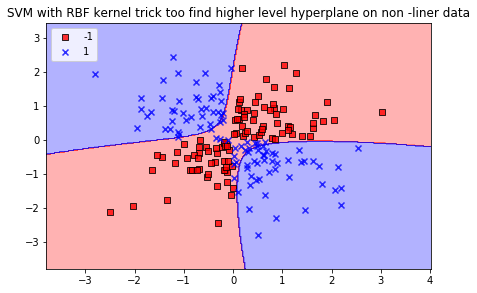

In [29]:
svm = SVC(kernel = 'rbf' , random_state = 1 , gamma = 0.1 , C = 10.0)

svm.fit(X_xor , y_xor)
plot_decision_regions(X_xor , y_xor ,classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.title("SVM with RBF kernel trick too find higher level hyperplane on non -liner data")
plt.show()



In [32]:
X_train , X_test , y_train , y_test = train_test_split(X_xor , y_xor , test_size =0.3, random_state = 1)

svm = SVC(kernel = 'rbf', random_state = 1 , gamma= 0.2 , C = 1.0)
svm.fit(X_train , y_train)

y_pred = svm.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))

Accuracy Score:
0.85


In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1,1,10,100] , 'gamma': [1,0.1,0.01,0.001]}

grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train ,y_train)

grid_predictions = grid.predict(X_test)

print('Accuracy Score')
print(accuracy_score(y_test , grid_predictions))

print(confusion_matrix(y_test, grid_predictions))

print("Tuned hyperparameter k :{}".format(grid.best_params_))
print("Best score :{}".format(grid.best_score_))

Accuracy Score
0.9666666666666667
[[32  0]
 [ 2 26]]
Tuned hyperparameter k :{'C': 10, 'gamma': 1}
Best score :0.9357142857142857


C:\Users\Shubham\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [33]:
print(sys.version)

3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
